# USED CARS PRICE PREDICTION - EDA

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the data

In [2]:
data = pd.read_csv(r"C:\Users\arthi\Downloads\USA_cars_datasets.csv")
df = pd.DataFrame(data)

### Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [5]:
df.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [6]:
df.tail(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


In [7]:
df.shape

(2499, 13)

The dataset consists of 2499 rows and 13 columns

In [8]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


### Data Cleaning

1. Handling Null Values

In [9]:
df.isnull()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,False,False,False,False,False,False,False,False,False,False,False,False,False
2495,False,False,False,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False,False,False,False


2. Drop/Replace/Mapping



In [10]:
#Drop the columns that are of no use
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [11]:
#Replacing the column values
df.replace({'condition': r' left$'},{'condition': ''}, regex = True, inplace = True)
df.head(4)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours


In [12]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


We can see that few of the cars have price as zero. This isn't practical. So, we need to replace these zero values with a resonably good value. In this case i will replace it with median of price column.

In [13]:
#Replacing the zero price values with median values
median_price = df['price'].median()
df['price'] = df['price'].astype(int)
df['price'].replace(0, median_price, inplace = True)

In [14]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,19058.467787,2016.714286,5.229869e+04,1.676914e+08
std,11862.212112,3.442656,5.970552e+04,2.038772e+05
min,25.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10800.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [15]:
#Mapping Datetime to Year column

print("Before mapping:",df.dtypes['year'])

def lookup(a):
    val = {i:pd.to_datetime(i, format = '%Y') for i in a.unique()}
    return a.map(val)

df['modified_year'] = lookup(df['year'])

print("After mapping: ",df.dtypes['modified_year'])

Before mapping: int64
After mapping:  datetime64[ns]


3. Changing Datatypes

In [16]:
# Changing dtype of 'title_status' to Categorical (ordinal)

print("Memory Usage of title_status before: ",df.title_status.memory_usage())
print("Dtype before:", df.dtypes['title_status'] ,", Unique values",df.title_status.unique())

Memory Usage of title_status before:  20120
Dtype before: object , Unique values ['clean vehicle' 'salvage insurance']


In [17]:
lst = ['clean vehicle','salvage insurance']
df['title_status'] = df.title_status.astype(pd.CategoricalDtype(lst,ordered=True))

print("Memory Usage of title_status after: ",df.title_status.memory_usage())
print("Dtype before:", df.dtypes['title_status'] ,", Unique values",df.title_status.unique())

Memory Usage of title_status after:  2751
Dtype before: category , Unique values ['clean vehicle', 'salvage insurance']
Categories (2, object): ['clean vehicle' < 'salvage insurance']


4. Data Standardization and Normalization

In [18]:
#Standardization

df['kilometer'] = 1.609*df['mileage']
df.head(4)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,441054.253
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,306598.168
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,63700.310
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,103210.914


In [19]:
#Normalization

df['mileage'] = df['mileage'] / df['mileage'].max()
df['kilometer'] = df['kilometer'] / df['kilometer'].max()
df['price_mod'] = df['price'] / df['price'].max()
df[['mileage','kilometer','price_mod']].head(4)

,mileage,kilometer,price_mod
0,0.269287,0.269287,0.074205
1,0.187194,0.187194,0.034146
2,0.038892,0.038892,0.063015
3,0.063016,0.063016,0.294464


5. Data Bining

It is the process of transforming continous numrical variable into discrete categorical 'bins', for grouped analysis

In [20]:
df.year.value_counts().head(10)

year
2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
Name: count, dtype: int64

In [21]:
val = np.linspace(min(df['year']),max(df['year']),6,dtype='int')
print(val)

group_names = ['1973-1982','1982-1991','1991-2001','2001-2010','2010-2020']

[1973 1982 1991 2001 2010 2020]


In [22]:
df['year_binned'] = pd.cut(df['year'], bins = val, labels = group_names, include_lowest = True)
df.head(4)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer,price_mod,year_binned
0,6300,toyota,cruiser,2008,clean vehicle,0.269287,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,0.269287,0.074205,2001-2010
1,2899,ford,se,2011,clean vehicle,0.187194,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,0.187194,0.034146,2010-2020
2,5350,dodge,mpv,2018,clean vehicle,0.038892,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,0.038892,0.063015,2010-2020
3,25000,ford,door,2014,clean vehicle,0.063016,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,0.063016,0.294464,2010-2020


6. Detecting Outliers

Outliers can play havoc when we want to apply machine learning algorithm for prediction. At the same time outliers can even help us for anomaly detection.

<AxesSubplot:title={'center':'price_mod'}, xlabel='year_binned'>

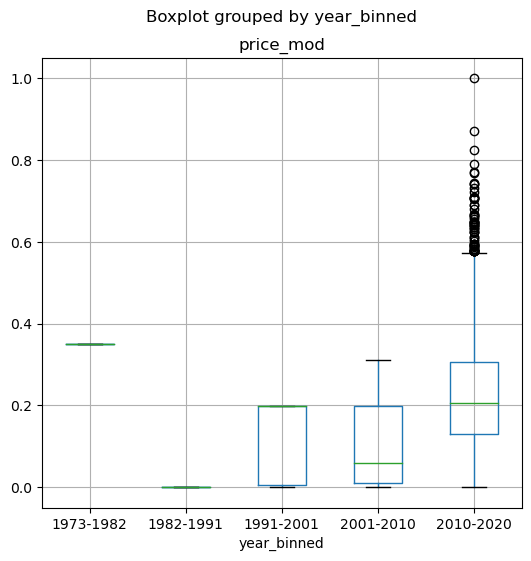

In [23]:
# Let's compare price and year 

df1 = df[['price_mod','year_binned']]
df1.boxplot(column = 'price_mod', by = 'year_binned', figsize = (6,6))

 We will retain the outliers in this scenario as its in acceptable range.

## Data Exploration and Visualization

Plotting the value counts of particular columns

<AxesSubplot:ylabel='year_binned'>

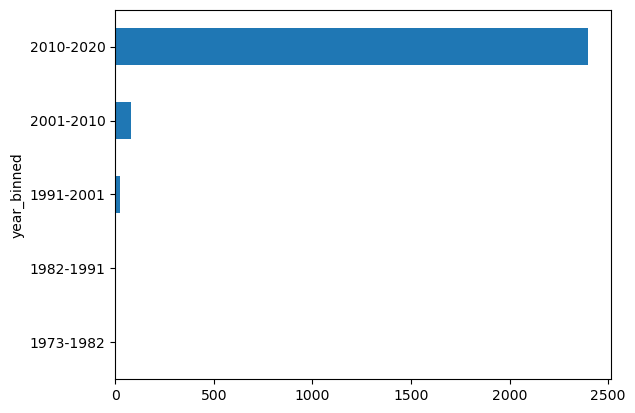

In [24]:
df['year_binned'].value_counts().sort_values().plot(kind = 'barh')


<AxesSubplot:xlabel='color'>

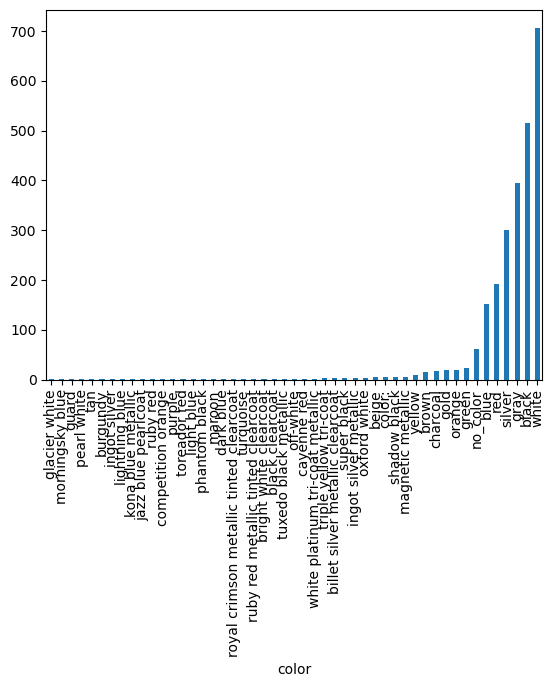

In [25]:
df['color'].value_counts().sort_values().plot(kind = 'bar')


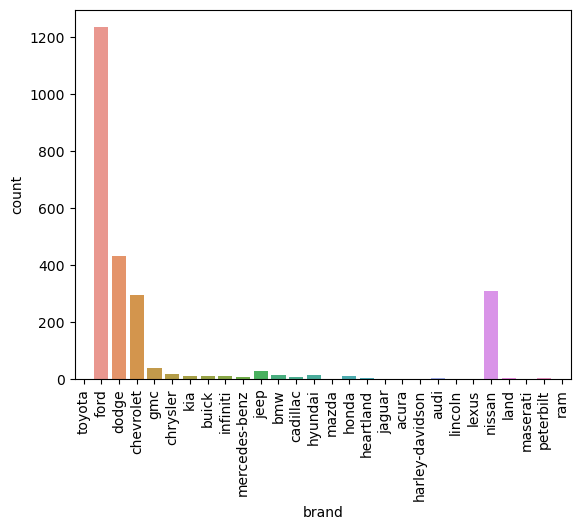

In [26]:
sns.countplot(x=df['brand'])
plt.xticks(rotation = 90);

country
 usa       2492
 canada       7
Name: count, dtype: int64

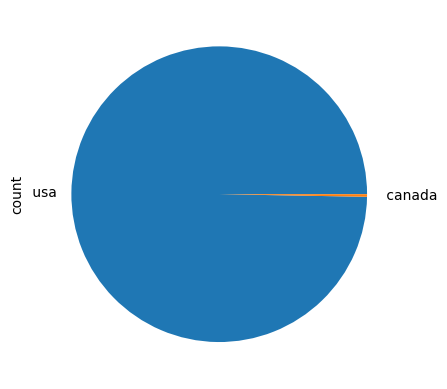

In [27]:
df['country'].value_counts().plot(kind= 'pie')
df['country'].value_counts()

<AxesSubplot:xlabel='state'>

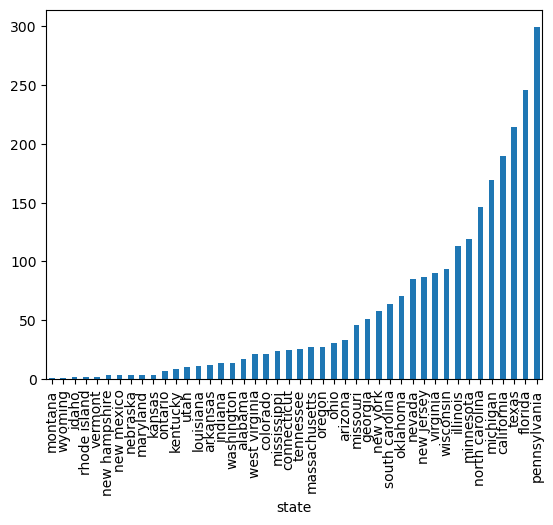

In [28]:
df['state'].value_counts().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='model'>

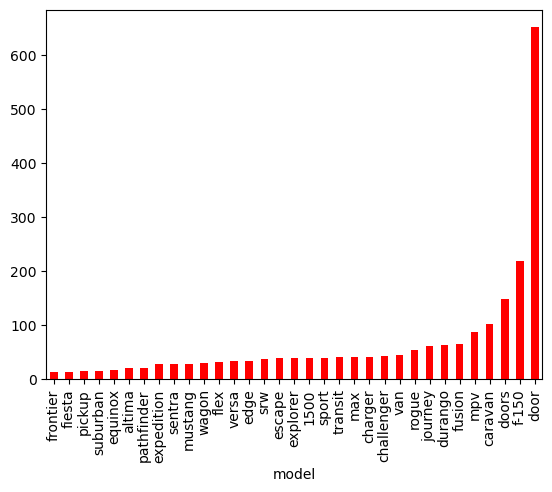

In [29]:
df['model'].value_counts()[0:33].sort_values().plot(kind = 'bar', color= "r")

Text(0, 0.5, 'No. of cars')

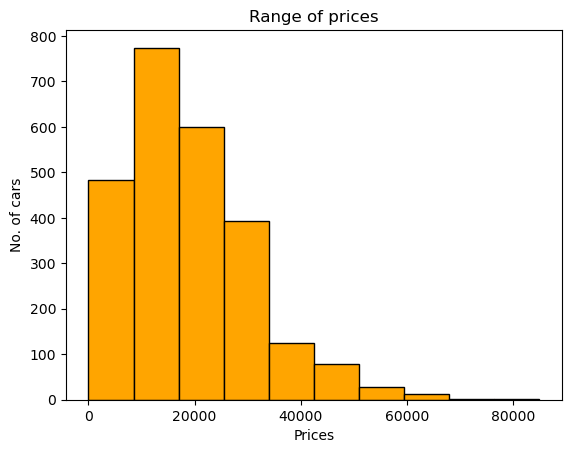

In [30]:
#Plotting a correlation, between No. of cars, and Prices
plt.hist(df['price'], color = 'orange', edgecolor = 'black',bins=10)
plt.title('Range of prices')
plt.xlabel('Prices')
plt.ylabel('No. of cars')

We can observe that most of the cars are having price range of 10k to 20k

Decade wise occupancy
 year_binned
2010-2020    0.958784
2001-2010    0.031613
1991-2001    0.008804
1973-1982    0.000400
1982-1991    0.000400
Name: proportion, dtype: float64


Last 5 years
 year
2019    0.465796
2018    0.206266
2017    0.196867
2016    0.106005
2020    0.025065
Name: proportion, dtype: float64


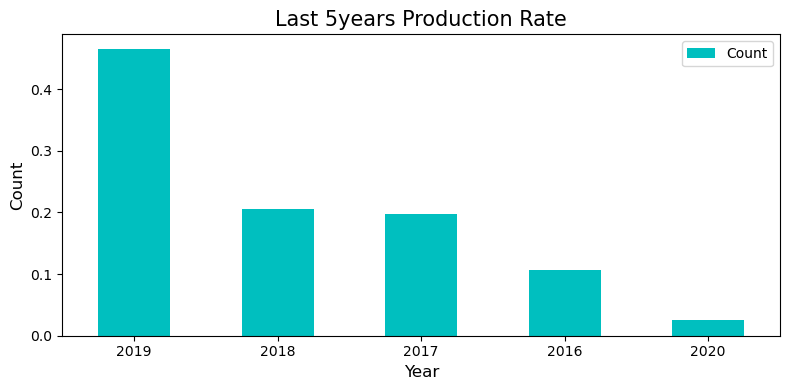

In [31]:
print("Decade wise occupancy\n",df.year_binned.value_counts(normalize=True))

print("\n")

#Let's see for last 5 years
print("Last 5 years\n",df[df.year>2015].year.value_counts(normalize=True))

resdf=df[df.year>2015].year.value_counts(normalize=True)

resdf.plot.bar(x=resdf.index,y=resdf.values,rot=0,figsize=(8,4),color='c',label="Count")
plt.title("Last 5years Production Rate",fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

2019 has seen twice the production sales of cars when comapred to 2018. 2018 and 2017 almost had same rate of production of cars

In [32]:
#Finding sales of Top 5 brands 

print(df.brand.value_counts(normalize=True).head(5))
dfpt = df.brand.value_counts().reset_index().rename(columns={'index':'brand','count':'count'}).head(5)

brand
ford         0.494198
dodge        0.172869
nissan       0.124850
chevrolet    0.118848
gmc          0.016807
Name: proportion, dtype: float64


In [33]:
dfpt

,brand,count
0,ford,1235
1,dodge,432
2,nissan,312
3,chevrolet,297
4,gmc,42


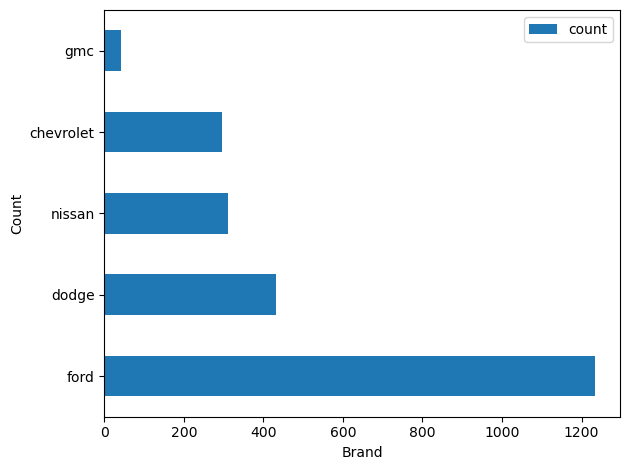

In [34]:
dfpt.plot.barh(x = 'brand',y ='count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Ford has been the leading Brand with more than 1200+ sales. Nissan and Chevrolet had equal occupancy in sales but below Dodge

In [35]:
#lets compare top brands by year
df1 = df[df.year>2015].groupby(['year','brand','modified_year']).size().to_frame('Count').reset_index()


#Brands with more than 50 prduction annually 
df2 = df1[df1['Count']>50]

#df3 for Bar Graph
df3 = pd.pivot_table(df2,values = 'Count',index = ['year'],columns = ['brand'], fill_value = 0)

#df4 for Line Graph
df4 = pd.pivot_table(df2,values = 'Count',index = ['modified_year'],columns=['brand'], fill_value = 0)

Text(0, 0.5, 'Count')

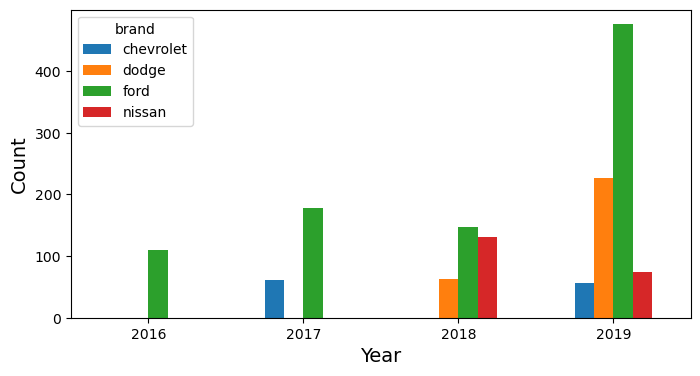

In [36]:
df3.plot.bar(rot=0,figsize=(8,4))
plt.xlabel('Year',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

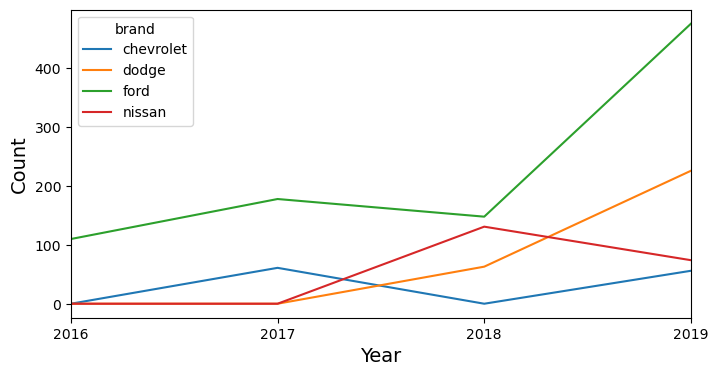

In [37]:
df4.plot.line(rot=0,figsize=(8,4))
plt.xlabel('Year',fontsize=14)
plt.ylabel('Count',fontsize=14)

Ford has the leading sales numbers compared to its competitors. In 2018, Ford and Nissan almost had same number of models rolling out.

In [38]:
#Checking Avg. Price based on State-Wise distribution - USA
df1 = df.copy()
df1['average_year_price']=df1.groupby('year')['price'].transform('mean')
df1.head(5)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer,price_mod,year_binned,average_year_price
0,6300,toyota,cruiser,2008,clean vehicle,0.269287,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,0.269287,0.074205,2001-2010,8444.722222
1,2899,ford,se,2011,clean vehicle,0.187194,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,0.187194,0.034146,2010-2020,8737.565217
2,5350,dodge,mpv,2018,clean vehicle,0.038892,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,0.038892,0.063015,2010-2020,19058.339241
3,25000,ford,door,2014,clean vehicle,0.063016,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,0.063016,0.294464,2010-2020,11979.855769
4,27700,chevrolet,1500,2018,clean vehicle,0.006537,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours,2018-01-01,0.006537,0.326266,2010-2020,19058.339241


In [39]:
df1['average_state_price'] = df1.groupby('state')['price'].transform('mean')
df1 = df1[df1['country'] != ' canada']
df1['average_state_price'].head(3)

0    16209.712644
1    16909.576923
2    16050.313725
Name: average_state_price, dtype: float64

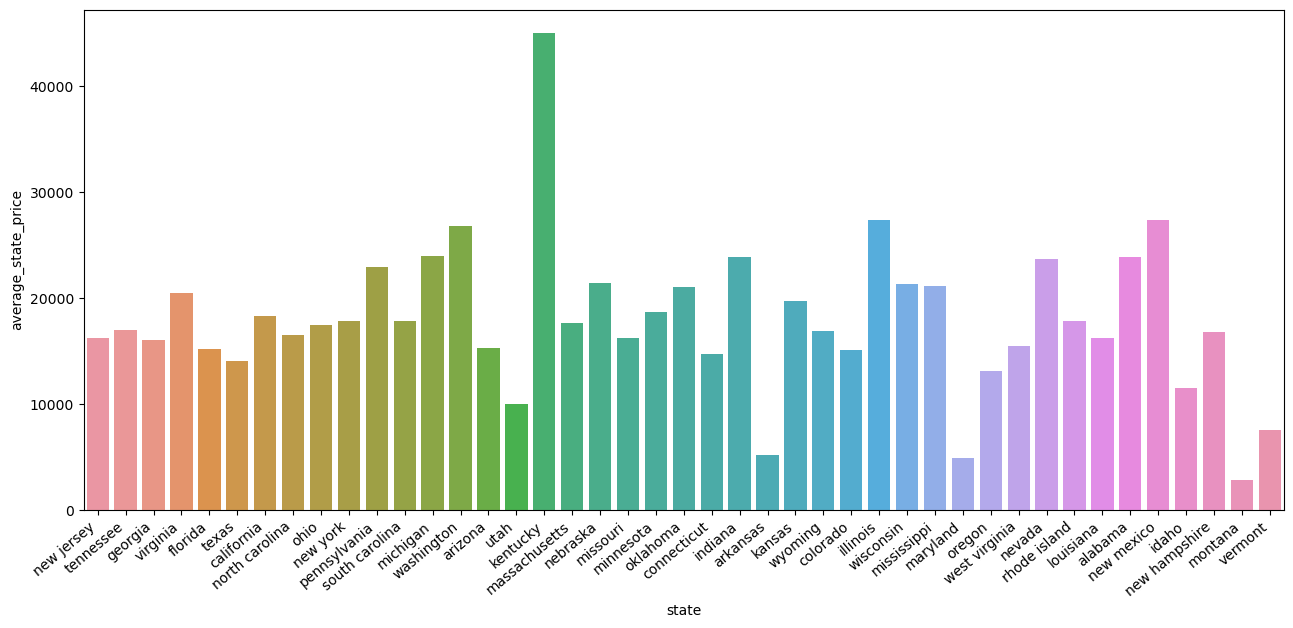

In [40]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x = df1['state'], y=df1['average_state_price'], ax=ax)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [41]:
#Checking Avg. Price based on Vehicle Color - USA
df1 = df.copy()
df1['average_color_price'] = df1.groupby('color')['price'].transform('mean')
df1 = df1[df1['country'] != ' canada']
df1.head(5)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer,price_mod,year_binned,average_color_price
0,6300,toyota,cruiser,2008,clean vehicle,0.269287,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,0.269287,0.074205,2001-2010,20486.046512
1,2899,ford,se,2011,clean vehicle,0.187194,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,0.187194,0.034146,2010-2020,17728.563333
2,5350,dodge,mpv,2018,clean vehicle,0.038892,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,0.038892,0.063015,2010-2020,17728.563333
3,25000,ford,door,2014,clean vehicle,0.063016,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,0.063016,0.294464,2010-2020,17864.569536
4,27700,chevrolet,1500,2018,clean vehicle,0.006537,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours,2018-01-01,0.006537,0.326266,2010-2020,19211.375000


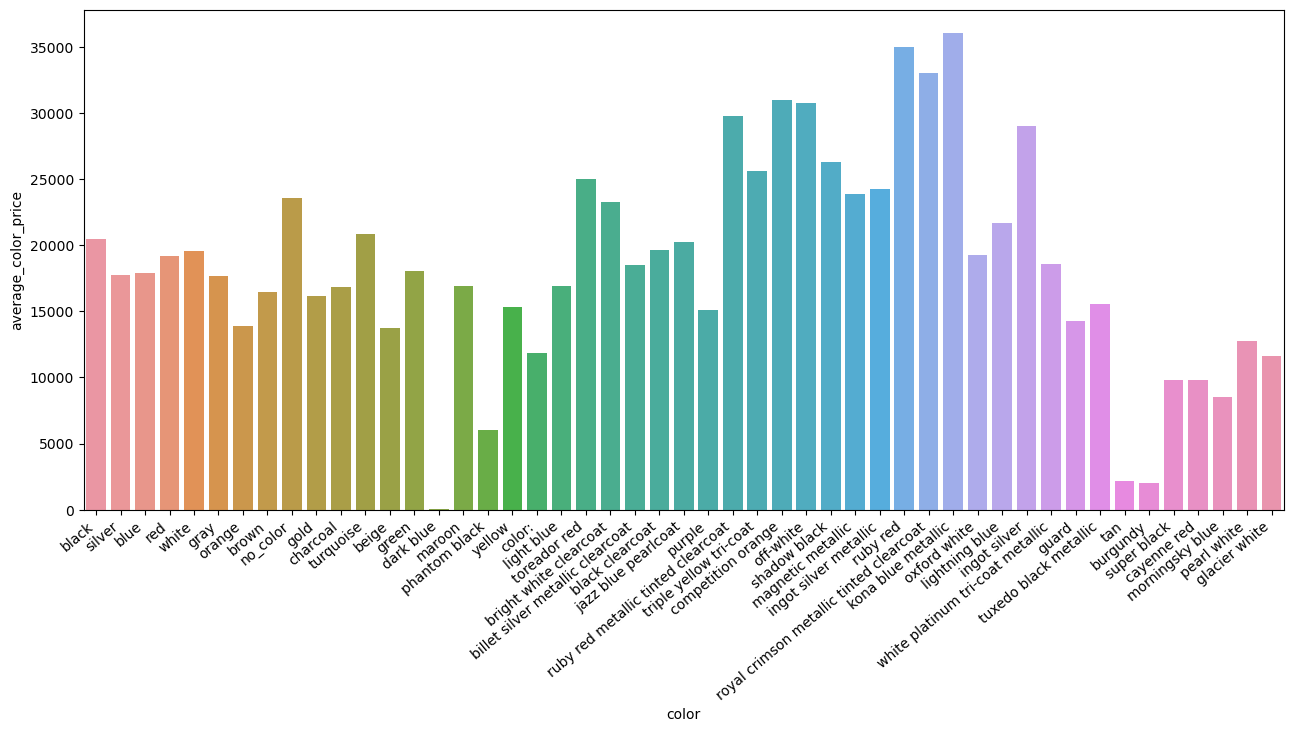

In [42]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x = df1['color'], y = df1['average_color_price'], ax = ax)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

<AxesSubplot:xlabel='mileage', ylabel='price'>

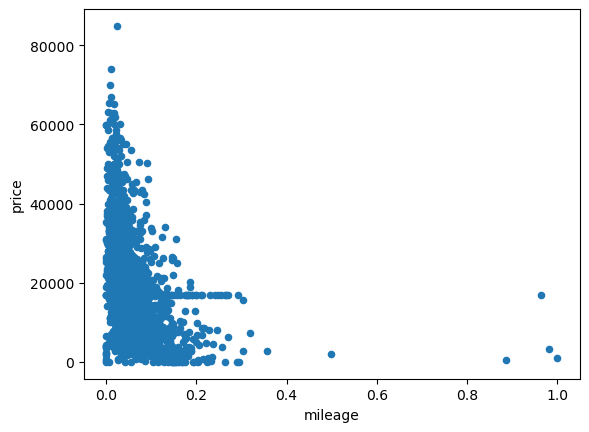

In [43]:
#Price dependancy on Mileage
df.plot.scatter(x="mileage", y="price")

Most cars ranging upto 20000 dollars have a better mileage between 0.1 to 0.3. Cars ranging 20000 dollars and above have mileage less than 0.2

Note: Mileage column had been normalized ranging from (0 to 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'peterbilt'),
  Text(1, 0, 'jaguar'),
  Text(2, 0, 'acura'),
  Text(3, 0, 'heartland'),
  Text(4, 0, 'hyundai'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'toyota'),
  Text(7, 0, 'jeep'),
  Text(8, 0, 'ram'),
  Text(9, 0, 'nissan'),
  Text(10, 0, 'gmc'),
  Text(11, 0, 'kia'),
  Text(12, 0, 'infiniti'),
  Text(13, 0, 'mazda'),
  Text(14, 0, 'dodge'),
  Text(15, 0, 'chevrolet'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'chrysler'),
  Text(18, 0, 'buick'),
  Text(19, 0, 'mercedes-benz'),
  Text(20, 0, 'ford'),
  Text(21, 0, 'land'),
  Text(22, 0, 'cadillac'),
  Text(23, 0, 'lincoln'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'maserati'),
  Text(26, 0, 'lexus'),
  Text(27, 0, 'harley-davidson')])

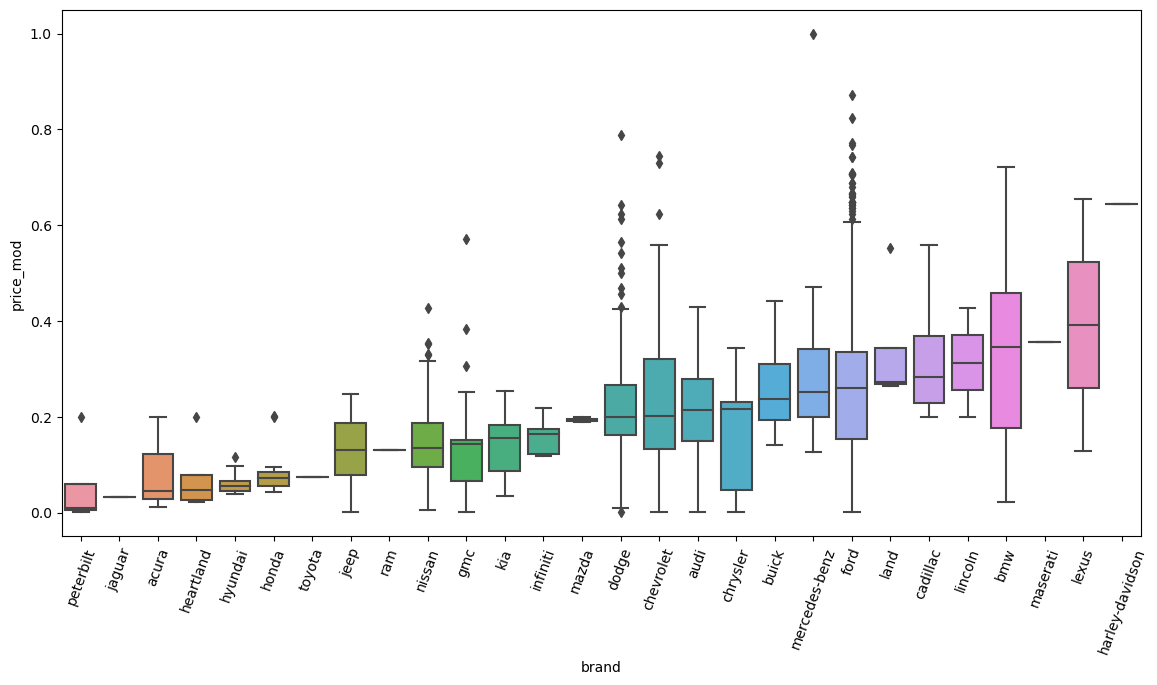

In [46]:
#Price range of various Models of cars
plt.figure(figsize=(12,6))
sorted_nb = df.groupby(['brand'])['price_mod'].median().sort_values()
sns.boxplot(x=df['brand'], y=df['price_mod'], order=list(sorted_nb.index))
plt.tight_layout()
plt.xticks(rotation=70)
